<a href="https://colab.research.google.com/github/salvadorrh/CS3432-Computer-Architecture/blob/main/Copy_of_HW9_SVM_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **HW9: Understanding and Implementing Support Vector Machines (SVMs) with Two Different Datasets**

* In this assignment, you will implementa  Support Vector Machines (SVM), a powerful and versatile supervised machine learning algorithm used for classification and regression tasks. You will also explore the nuances of hyperparameter tuning to optimize model performance. This exploration will not be limited to a single type of data; instead, you will apply your knowledge and skills to two distinct datasets: the Breast Cancer dataset and the Digits dataset.

* Each dataset presents its own unique challenges and learning opportunities, allowing you to understand the breadth of SVM's applicability. Through this process, you will practice your hands-on skills in data preprocessing, model training, evaluation, and the critical task of hyperparameter tuning to achieve the best possible model performance. Enjoy!

## **TODO: Write your name here:**



### **Import Libraries**

* Review each library imported below and let it help you understand what you will be utilizing from scikit-learn and other libraries. Take the time to review official documentation to familiarize yourself with the modules that you are not familiar with.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

## **PART 1: Implementation an SVM Classifier on the Breast Cancer Dataset**

### **Q1: Load the Dataset**

* For this first part of the exercise, we will use the breast cancer dataset that you have worked on before. This will allow you to implement the application of a different classifier on the dataset and observe its results.

In [ ]:
def load_data():
    """
    Load the breast cancer dataset from scikit-learn.

    Returns:
        tuple: A tuple containing:
            - X (numpy.ndarray): The feature matrix.
            - y (numpy.ndarray): The target vector.
    """
    data = datasets.load_breast_cancer()
    X = data.data
    y = data.target
    return X, y

In [ ]:
X, y = load_data()

### **Q2: Exploratory Data Analysis (EDA)**

* Perform a basic EDA to understand the distribution of classes and features.
* Using scatter plot, plot the distribution of the first two features and print basic dataset info.

In [ ]:
def explore_data(X, y):
    """
    Perform a basic exploratory data analysis to understand the distribution of classes and features.

    Args:
        X (numpy.ndarray): The feature matrix for the dataset.
        y (numpy.ndarray): The target vector for the dataset.
    """
    plt.figure(figsize=(10, 6))
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Distribution of Classes')
    plt.show()

    print(f"Dataset shape: {X.shape}")
    print(f"Classes distribution: {np.bincount(y)}")

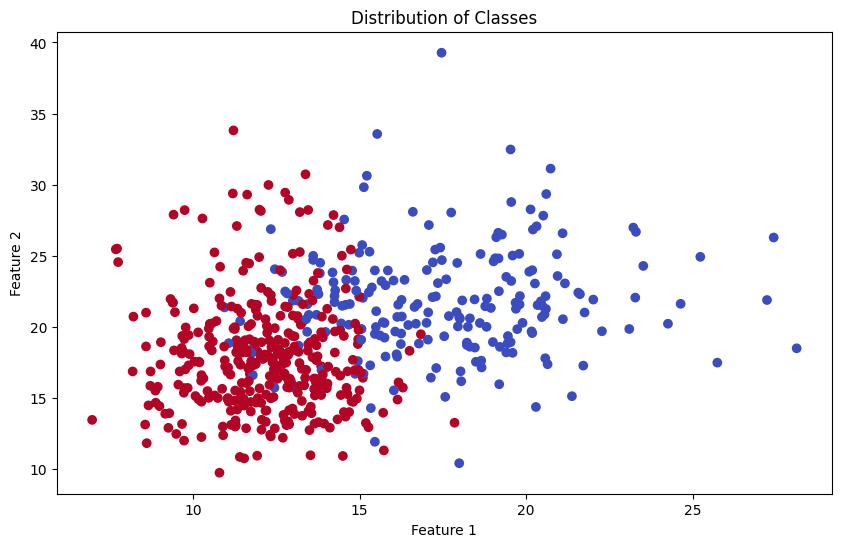

Dataset shape: (569, 30)
Classes distribution: [212 357]


In [ ]:
explore_data(X,y)

### **Q3: Implementing SVM**

* Implement a function called `preprocess_data()` that takes `X`, applies standard scaling to the dataset and returns the scaled `X` feature set.
* Implement a function called `train_svm()` that takes in `X`, `y`, splits the data into train and test sets, creates a SVM classifier using scikit-learn, with  linear kernel, and returns the model, `X_test`, and `y_test`

In [ ]:
def preprocess_data(X):
    """
    Applies standard scaling to the dataset.

    Args:
        X (numpy.ndarray): The feature matrix to be scaled.

    Returns:
        numpy.ndarray: The scaled feature matrix.
    """
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    return X_scaled

def train_svm(X, y):
    """
    Splits the data, preprocesses it, and trains an SVM model.

    Args:
        X (numpy.ndarray): The feature matrix.
        y (numpy.ndarray): The target vector.

    Returns:
        tuple: A tuple containing:
            - model (SVC): The trained SVM model.
            - X_test (numpy.ndarray): The test set features.
            - y_test (numpy.ndarray): The test set targets.
    """
    X_scaled = preprocess_data(X)
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

    model = SVC(kernel='linear')
    model.fit(X_train, y_train)

    return model, X_test, y_test

In [ ]:
model, X_test, y_test = train_svm(X, y)

### **Q4: Model Evaluation**

In [ ]:
def evaluate_model(model, X_test, y_test):
    """
    Predicts using the model and evaluates the performance on the test set.
    Implement a confusion_matrix plot using seaborn library.
    Prints the precision, recall, and F1 scores using the classification_report() method [ This is a method in scikit-learn].

    Args:
        model (SVC): The trained SVM model.
        X_test (numpy.ndarray): The test set features.
        y_test (numpy.ndarray): The test set targets.
    """
    predictions = model.predict(X_test)
    cm = confusion_matrix(y_test, predictions)

    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=model.classes_, yticklabels=model.classes_)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()

    print(classification_report(y_test, predictions))

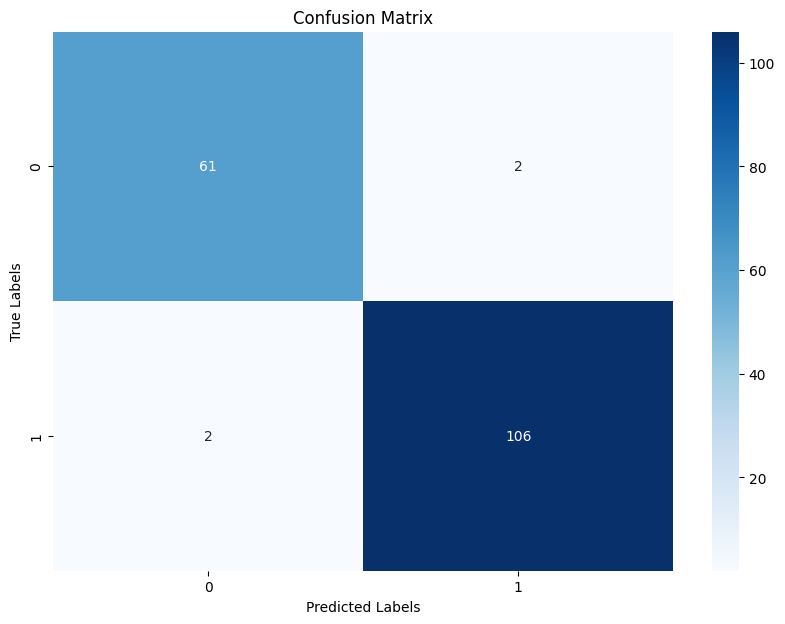

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        63
           1       0.98      0.98      0.98       108

    accuracy                           0.98       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



In [ ]:
evaluate_model(model, X_test, y_test)

### **Q5: Experimentation and Fine-Tuning**

* We will use GridSearchCV to find the best model which will perform a hyperparameter tuning. Review the docstring for the function and complete the implementation of this method.

In [ ]:
def tune_svm(X, y):
    """
    Performs hyperparameter tuning for the SVM model using grid search (GridSearchCV()).

    Args:
        X (numpy.ndarray): The feature matrix.
        y (numpy.ndarray): The target vector.

    Returns:
        tuple: A tuple containing:
            - best_estimator_ (SVC): The best model found by GridSearchCV.
            - X_test (numpy.ndarray): The test set features.
            - y_test (numpy.ndarray): The test set targets.
    """
    X_scaled = preprocess_data(X)
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

    param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [0.001, 0.0001], 'kernel': ['rbf', 'poly', 'linear']}
    grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2)
    grid.fit(X_train, y_train)

    print("Best parameters found:")
    print(grid.best_params_)
    return grid.best_estimator_, X_test, y_test

## **PART 2: Implementation an SVM Classifier on the Digits Dataset**

* For all the questions below, follow the details of a given function and implement it accordingly.

### **Q6: Load the Dataset**

In [ ]:
def load_digits_data():
    """
    Load the Digits dataset from scikit-learn. This dataset is named load_digits()

    Returns:
        tuple: A tuple containing:
            - X (numpy.ndarray): The feature matrix.
            - y (numpy.ndarray): The target vector.
    """
    data = datasets.load_digits()
    X_digits = data.data
    y_digits = data.target
    return X_digits, y_digits

In [ ]:
X_digits, y_digits = load_digits_data()

### **Q7: Visualize the Digits**

In [ ]:
def visualize_digits(X_digits, y_digits):
    """
    Visualizes the first few images and their labels from the digits dataset.

    Args:
        X (numpy.ndarray): The feature matrix for the digits dataset.
        y (numpy.ndarray): The target vector for the digits dataset.
    """
    fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(12, 6))
    # print(axes.flatten())
    print(X_digits[1].shape)
    for i, ax in enumerate(axes.flatten()):
        ax.imshow(X_digits[i].reshape((8, 8)), cmap='gray', interpolation='none', aspect='equal')
        ax.set_title(f"Label: {y_digits[i]}")
        ax.axis('off')
        # ax.grid(color='r', linestyle='-', linewidth=2)

    plt.tight_layout()
    plt.show()

(64,)


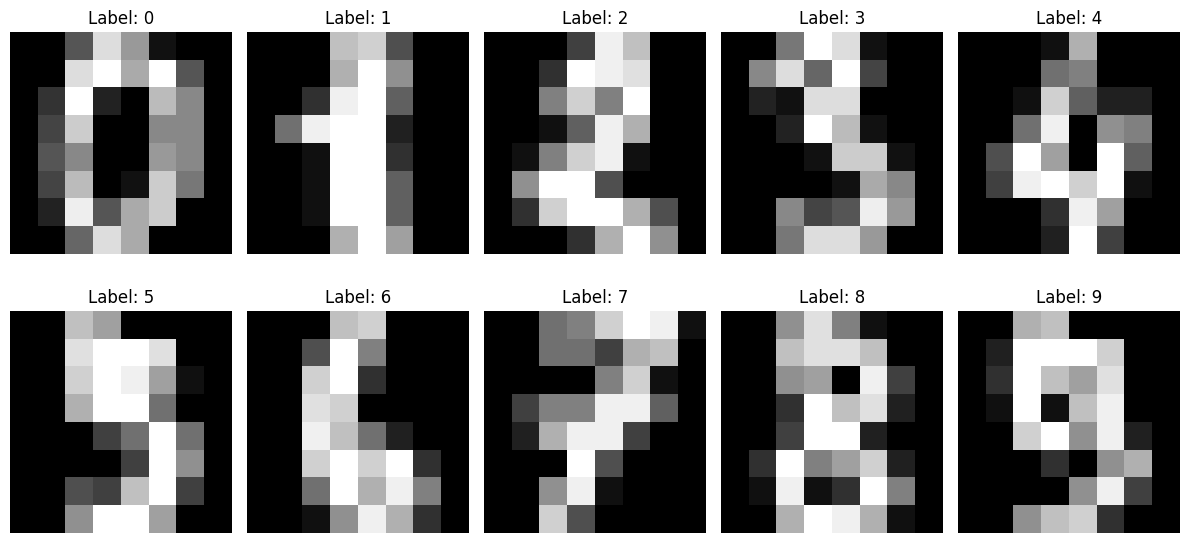

In [ ]:
visualize_digits(X_digits, y_digits)

### **Q8: Preprocess Data**

In [ ]:
def preprocess_digits_data(X_digits):
    """
    Applies standard scaling to the dataset.

    Args:
        X (numpy.ndarray): The feature matrix to be scaled.

    Returns:
        numpy.ndarray: The scaled feature matrix.
    """
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_digits)
    return X_scaled


### **Q9: Train the SVM on the digits dataset**

In [ ]:
def train_svm(X_digits, y_digits):
    """
    Splits the data, preprocesses it, and trains an SVM model.

    Args:
        X (numpy.ndarray): The feature matrix.
        y (numpy.ndarray): The target vector.

    Returns:
        tuple: A tuple containing:
            - model (SVC): The trained SVM model.
            - X_test (numpy.ndarray): The test set features.
            - y_test (numpy.ndarray): The test set targets.
    """
    X_scaled = preprocess_data(X_digits)
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_digits, test_size=0.3, random_state=42)

    model = SVC(kernel='linear')
    model.fit(X_train, y_train)

    return model, X_test, y_test

In [ ]:
model, X_test, y_test = train_svm(X_digits, y_digits)

### **Q10: Evaluate the Model**



In [ ]:
def evaluate_digits_model(model, X_test, y_test):
    """
    Predicts using the model, evaluates the performance on the test set, and plots the confusion matrix.

    Args:
        model (SVC): The trained SVM model.
        X_test (numpy.ndarray): The test set features.
        y_test (numpy.ndarray): The test set targets.
    """
    predictions = model.predict(X_test)
    cm = confusion_matrix(y_test, predictions)

    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=model.classes_, yticklabels=model.classes_)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()

    print(classification_report(y_test, predictions))

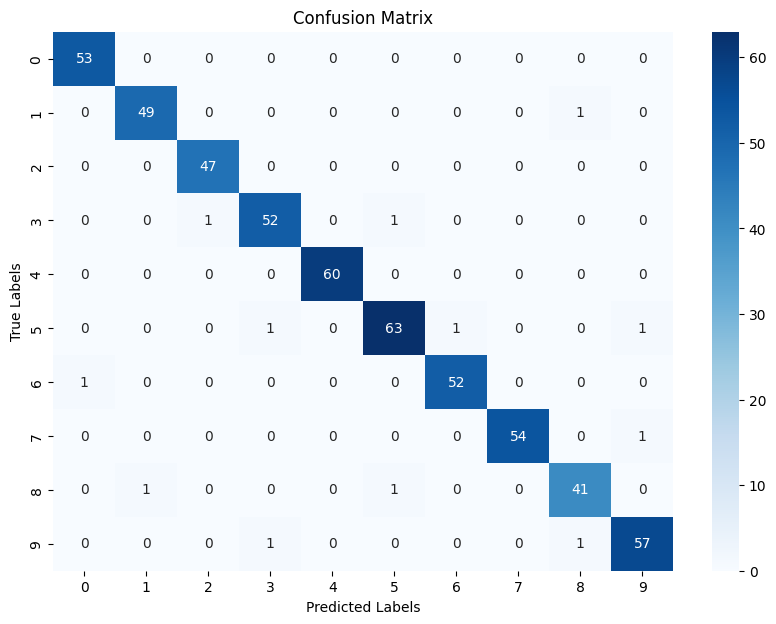

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        53
           1       0.98      0.98      0.98        50
           2       0.98      1.00      0.99        47
           3       0.96      0.96      0.96        54
           4       1.00      1.00      1.00        60
           5       0.97      0.95      0.96        66
           6       0.98      0.98      0.98        53
           7       1.00      0.98      0.99        55
           8       0.95      0.95      0.95        43
           9       0.97      0.97      0.97        59

    accuracy                           0.98       540
   macro avg       0.98      0.98      0.98       540
weighted avg       0.98      0.98      0.98       540



In [ ]:
evaluate_digits_model(model, X_test, y_test)

### **Q11: Tune the Digits SVM**

In [ ]:
def tune_svm(X_digits, y_digits):
    """
    Performs hyperparameter tuning for the SVM model using grid search.

    Args:
        X (numpy.ndarray): The feature matrix.
        y (numpy.ndarray): The target vector.

    Returns:
        tuple: A tuple containing:
            - best_estimator_ (SVC): The best model found by GridSearchCV.
            - X_test (numpy.ndarray): The test set features.
            - y_test (numpy.ndarray): The test set targets.
    """
    X_scaled = preprocess_data(X_digits)
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_digits, test_size=0.3, random_state=42)

    param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [0.001, 0.0001], 'kernel': ['rbf', 'poly', 'linear']}
    grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2)
    grid.fit(X_train, y_train)

    print("Best parameters found:")
    print(grid.best_params_)
    return grid.best_estimator_, X_test, y_test

## **Bringing it Together**

To illustrate the versatility of Support Vector Machines (SVMs) and demonstrate their application on both the Breast Cancer and Digits datasets, I have created a main function. This function will sequentially execute the steps for each dataset, from loading data to model evaluation, and display the results. The structure will help you compare SVM performance across different types of data (i.e., tabular data and image data).

## **Inspect each output below and confirm your understanding.**

===== SVM with Breast Cancer Dataset =====


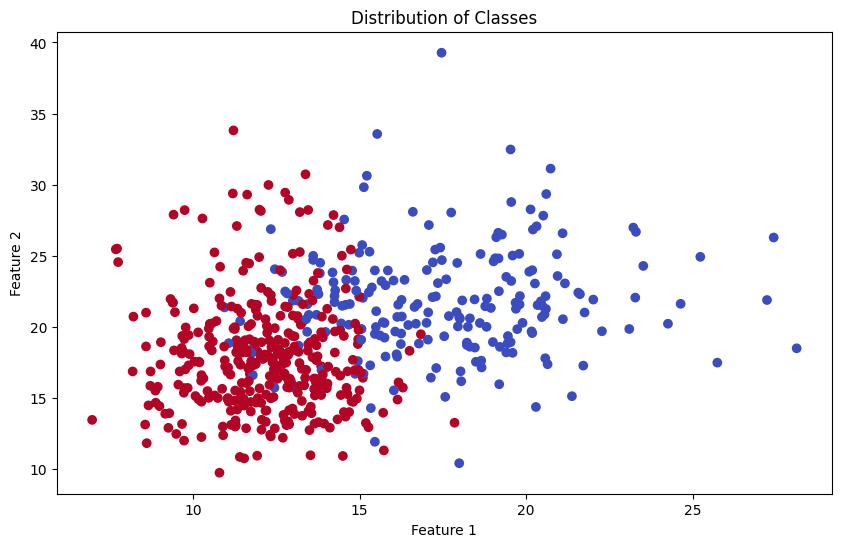

Dataset shape: (569, 30)
Classes distribution: [212 357]
Evaluation of the SVM model on the Breast Cancer dataset:


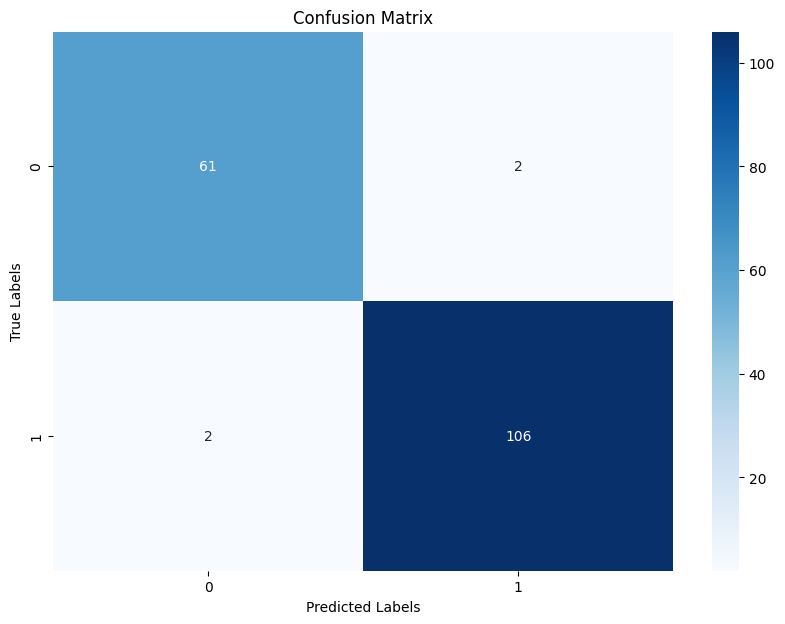

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        63
           1       0.98      0.98      0.98       108

    accuracy                           0.98       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.

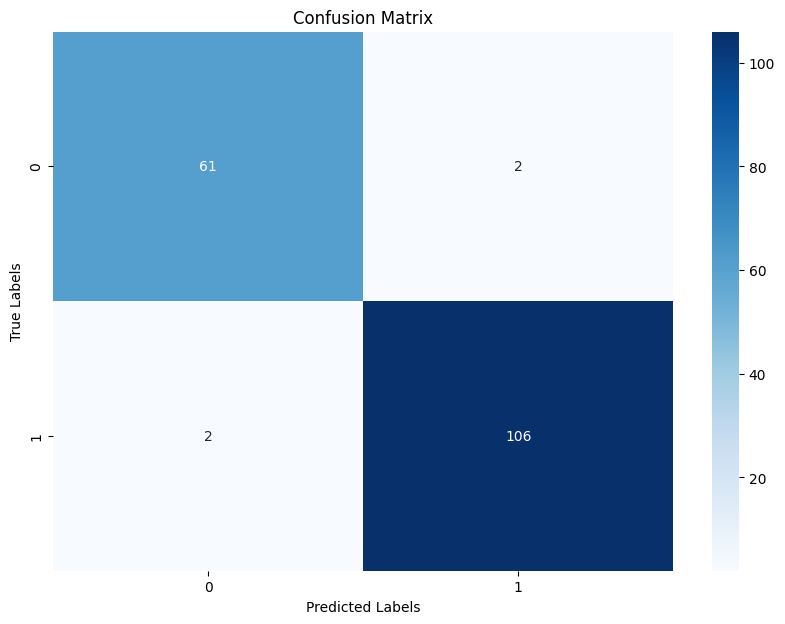

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        63
           1       0.98      0.98      0.98       108

    accuracy                           0.98       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171


===== SVM with Digits Dataset =====
(64,)


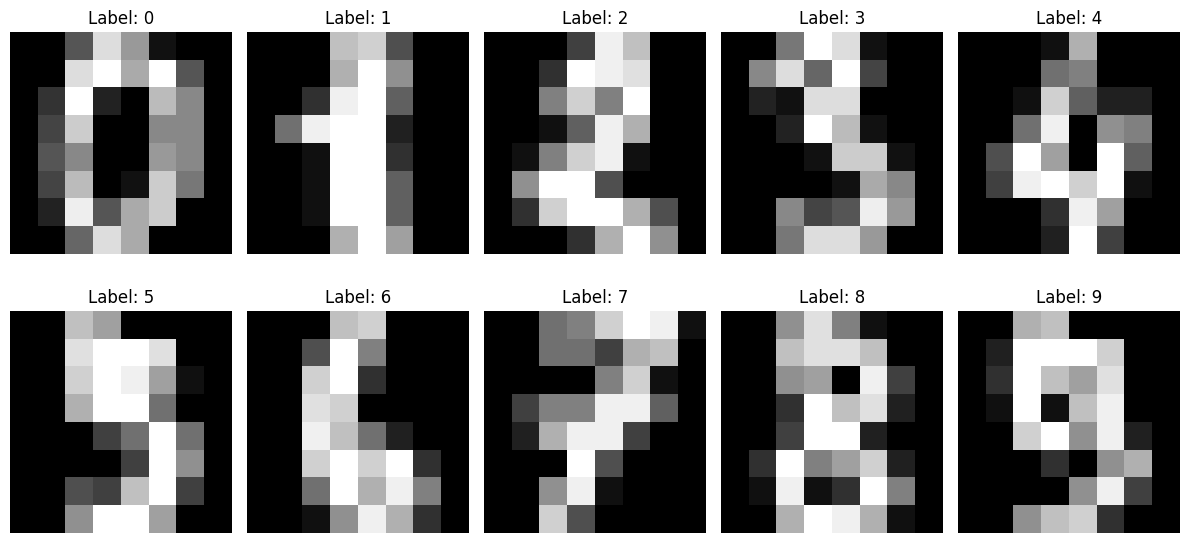

Evaluation of the SVM model on the Digits dataset:


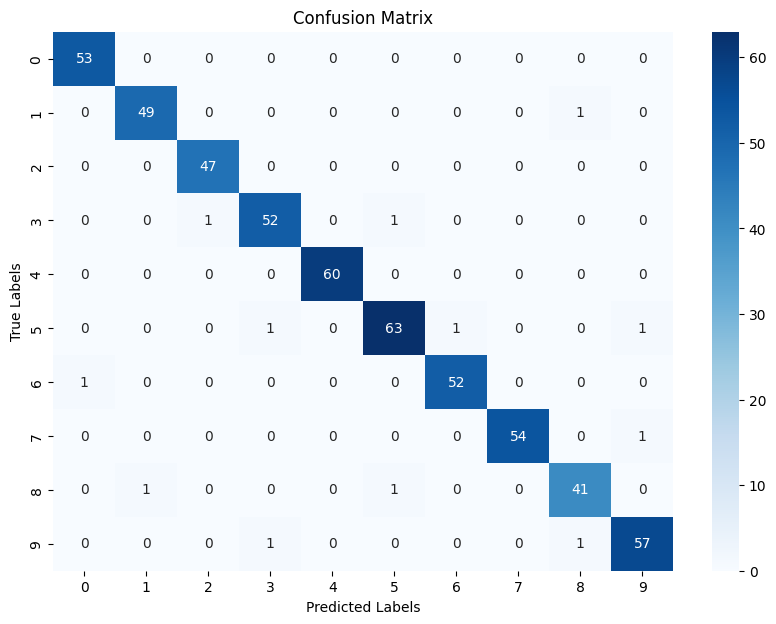

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        53
           1       0.98      0.98      0.98        50
           2       0.98      1.00      0.99        47
           3       0.96      0.96      0.96        54
           4       1.00      1.00      1.00        60
           5       0.97      0.95      0.96        66
           6       0.98      0.98      0.98        53
           7       1.00      0.98      0.99        55
           8       0.95      0.95      0.95        43
           9       0.97      0.97      0.97        59

    accuracy                           0.98       540
   macro avg       0.98      0.98      0.98       540
weighted avg       0.98      0.98      0.98       540

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   0.4s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   0.3s
[CV] END ........

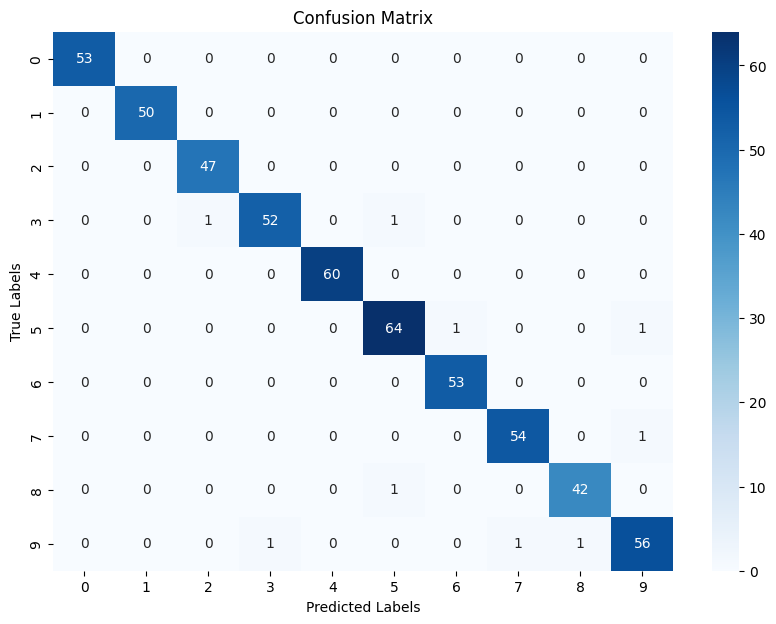

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       1.00      1.00      1.00        50
           2       0.98      1.00      0.99        47
           3       0.98      0.96      0.97        54
           4       1.00      1.00      1.00        60
           5       0.97      0.97      0.97        66
           6       0.98      1.00      0.99        53
           7       0.98      0.98      0.98        55
           8       0.98      0.98      0.98        43
           9       0.97      0.95      0.96        59

    accuracy                           0.98       540
   macro avg       0.98      0.98      0.98       540
weighted avg       0.98      0.98      0.98       540



In [ ]:
def main():
    """
    Main function to demonstrate the application of SVMs on the Breast Cancer and Digits datasets.
    """
    print("===== SVM with Breast Cancer Dataset =====")
    # Load the breast cancer dataset
    X_bc, y_bc = load_data()
    explore_data(X_bc, y_bc)

    # Train and evaluate the SVM model on the breast cancer dataset
    model_bc, X_test_bc, y_test_bc = train_svm(X_bc, y_bc)
    print("Evaluation of the SVM model on the Breast Cancer dataset:")
    evaluate_model(model_bc, X_test_bc, y_test_bc)

    # Tune the SVM model on the breast cancer dataset
    best_model_bc, X_test_bc, y_test_bc = tune_svm(X_bc, y_bc)
    print("\nEvaluation of the best model from Grid Search on the Breast Cancer dataset:")
    evaluate_model(best_model_bc, X_test_bc, y_test_bc)

    print("\n===== SVM with Digits Dataset =====")
    # Load the digits dataset
    X_dg, y_dg = load_digits_data()
    visualize_digits(X_dg, y_dg)

    # Train and evaluate the SVM model on the digits dataset
    model_dg, X_test_dg, y_test_dg = train_svm(X_dg, y_dg)
    print("Evaluation of the SVM model on the Digits dataset:")
    evaluate_model(model_dg, X_test_dg, y_test_dg)

    # Tune the SVM model on the digits dataset
    best_model_dg, X_test_dg, y_test_dg = tune_svm(X_dg, y_dg)
    print("\nEvaluation of the best model from Grid Search on the Digits dataset:")
    evaluate_model(best_model_dg, X_test_dg, y_test_dg)

if __name__ == "__main__":
    main()